### Multiple Linear Regression Model using Gradient Descent (w/o numpy and pandas)

In [776]:
# Importing libraries

from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [777]:
# Using dataset from sklearn

boston = datasets.load_boston()

In [778]:
# Loading dataset

df = pd.DataFrame(data = boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [779]:
# Renaming columns

df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [780]:
# Adding our target variable

df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Model Building

In [781]:
# Defining our dependent and independent variables

X = df.drop('Price', axis=1)   # independent variables / features
y = df['Price']                # dependent variable / label

In [782]:
# Train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [783]:
# Scaling data

X_train_scaled = ((X_train - X_train.mean()))/X_train.std()

In [784]:
# Converting DataFrame values to List

X_array = X_train_scaled.values

x_list = X_array.tolist()

y_array = [y_train.values.tolist()]

In [785]:
# Adding a column of ones to dependent variable for Intercept

def add1Col(mat):
    # Add columns of 1 at index 0
    for row in range(len(mat)) :
        mat[row].insert(0,1)
    return mat

In [786]:
# Defining a function to get transpose of a matrix

def get_transpose(x):
    result = [[0 for column in range(len(x))] for row in range(len(x[0]))]
    for i in range(len(x)):
        for j in range(len(x[0])):
            result[j][i] = x[i][j]
    return result

In [787]:
# Defining a function for matrix product (i.e. instead of using np.dot)

def get_dot_prod(mat1, mat2):
    res = []
    for i in range(len(mat1)):
        row = []
        for j in range(len(mat2[0])):
            val = 0
            for k in range(len(mat2)):
                val += mat1[i][k] * mat2[k][j]
            row.append(val)
        res.append(row)
    return res

In [788]:
# Defining a function to subtract 2 lists

def subtractList(l1, l2):

    l2 = get_transpose(l2)
    
    diff = []
    for i in range(len(l1)):
        for j in range(len(l1[0])):   
            diff.append([l1[i][0]-l2[i][0]])
            
    return diff

In [789]:
# Defining Gradient Descent Function for MLR

def grad_descent_fun(X, y, alpha, epoch):
    
    # Intercept and features
    X = add1Col(x_list)     
    
    # theta initialization
    n = len(X[0])
    theta = [[]]
    for i in range(n):
        theta[0].append(1)
        
    # predicted values
    theta_t = get_transpose(theta)
    h = get_dot_prod(X, theta_t)           
    
    #Gradient descent
    cost = []
    
    for i in range(epoch): 
        a_div_x = alpha/len(X)
        error = subtractList(h, y)              # error = y_pred - y_actual
        sum_error = sum(map(sum, error))        # sum of error
        theta[0][0] = theta[0][0] - (a_div_x)*sum_error         # theta for intercept
        
        # theta for features (other than intercept)
        X_t = get_transpose(X) 
        for j in range (1, len(theta[0])):
            error_X = get_dot_prod([X_t[j]], error)
            sum_error_X = sum(map(sum, error_X))   
            theta[0][j] = theta[0][j] - (a_div_x)*sum_error_X
            
        # appending cost values to list 
        theta_t = get_transpose(theta)
        h = get_dot_prod(X, theta_t)
        m = len(X[0]) 
        error_sq = []
        for p in range(len(error)):
            error_sq.append(error[p][0]**2)      
        cost.append(1/(2*m)*sum(error_sq))

    return(cost, theta)    

In [790]:
cost_out, theta_out = grad_descent_fun(x_list, y_array, 0.01, 1000)
print(theta_out)

[[22.74454144648186, -0.8838587552152098, 0.7725972003931756, -0.21417735827251555, 0.6824405391664868, -1.2907232047993442, 2.9738546328467024, -0.3664114726095457, -2.551996663430787, 1.0557238423893738, -0.9433578059669033, -2.178547985259284, 0.6088913164147599, -3.3085282136435343]]


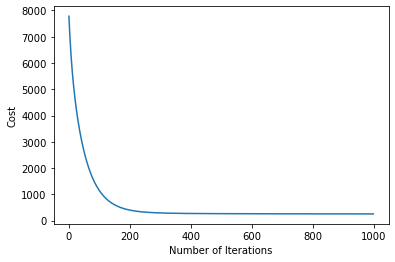

In [791]:
# Plotting cost for iterations

import matplotlib.pyplot as plt

plt.plot(cost_out)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()